In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read data

# filename = './data/driving_log.csv'
filename = './record/driving_log.csv'
df = pd.read_csv(filename, float_precision='high')
data = df.values

print(df.head())

                                        Center Image  \
0  /home/isslab/CS/fork/CarND-Behavioral-Cloning-...   
1  /home/isslab/CS/fork/CarND-Behavioral-Cloning-...   
2  /home/isslab/CS/fork/CarND-Behavioral-Cloning-...   
3  /home/isslab/CS/fork/CarND-Behavioral-Cloning-...   
4  /home/isslab/CS/fork/CarND-Behavioral-Cloning-...   

                                          Left Image  \
0  /home/isslab/CS/fork/CarND-Behavioral-Cloning-...   
1  /home/isslab/CS/fork/CarND-Behavioral-Cloning-...   
2  /home/isslab/CS/fork/CarND-Behavioral-Cloning-...   
3  /home/isslab/CS/fork/CarND-Behavioral-Cloning-...   
4  /home/isslab/CS/fork/CarND-Behavioral-Cloning-...   

                                         Right Image  Steering  Throttle  \
0  /home/isslab/CS/fork/CarND-Behavioral-Cloning-...  0.000000  0.100000   
1  /home/isslab/CS/fork/CarND-Behavioral-Cloning-...  0.000000  0.000000   
2  /home/isslab/CS/fork/CarND-Behavioral-Cloning-...  0.000000  0.000000   
3  /home/isslab/CS/for

In [3]:
images = []
measurements = []
for line in data:
    center_img_path = line[0]
    left_img_path = line[1]
    right_img_path = line[2]
    center_image = cv2.imread(center_img_path)
    left_image = cv2.imread(left_img_path)
    right_image = cv2.imread(right_img_path)
#     image = cv2.imread("./data/" + img_path)
    center_image = cv2.cvtColor(center_image, cv2.COLOR_BGR2RGB)
    left_image = cv2.cvtColor(left_image, cv2.COLOR_BGR2RGB)
    right_image = cv2.cvtColor(right_image, cv2.COLOR_BGR2RGB)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # flip our image horizontally
    center_image_flipped = np.fliplr(center_image)

    images.extend([center_image, left_image, right_image, center_image_flipped])
    
    
    steering_center = float(line[3])
    
    # create adjusted steering measurements for the side camera images
    correction = 0.2 # this is a parameter to tune
    steering_left = steering_center + correction
    steering_right = steering_center - correction
    
    steering_center_flipped = -steering_center
    
    measurements.extend([steering_center, steering_left, steering_right, steering_center_flipped])
    
num_samples = len(images)

# X_train = np.array(images).reshape(num_samples, images[0].shape[0], images[0].shape[1], 1)
X_train = np.array(images)
y_train = np.array(measurements)

In [4]:
# data overview

print(X_train.shape)
print(y_train.shape)
print(X_train.dtype)
print(y_train.dtype)

(41680, 160, 320, 3)
(41680,)
uint8
float64


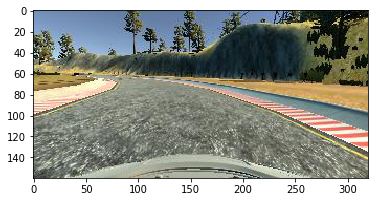

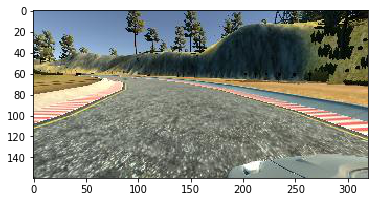

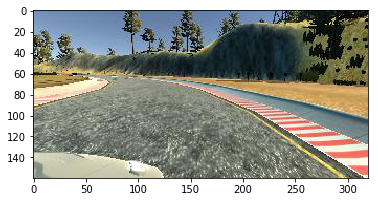

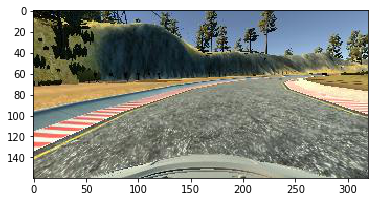

In [5]:
plt.imshow(X_train[0])
plt.show()
plt.imshow(X_train[1])
plt.show()
plt.imshow(X_train[2])
plt.show()
plt.imshow(X_train[3])
plt.show()

In [ ]:
# # data normalize

# # First we should change type of features from int8 to float32 in order to do normalize
# X_train = X_train.astype(np.float32)

# # Then set flags for feature engineering tasks I am going to do.  This will prevent me from skipping an important step.
# is_features_normal = False

# def normalize_dataset(image_data):
#     """
#     Normalize the image data
#     :param image_data: The image data to be normalized
#     :return: Normalized image data
#     """    
#     # +, -, *, / in np.array will automatically broadcast to every element
#     return (image_data - 128.)/128

# if not is_features_normal:
#     print("Normalizing ...")
#     X_train = normalize_dataset(X_train)
#     is_features_normal = True

# print("Finish Normalization !")

# # Make sure we do Normalization before training the model
# assert is_features_normal, 'You skipped the step to normalize the features'

In [6]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Cropping2D
from keras.layers import Conv2D, MaxPooling2D, Dropout

Using TensorFlow backend.


In [8]:
# This is a regression network

# here we do two preprocessing
# (1) normalize the data
# (2) mean centering the data
input_shape = X_train[0].shape

model = Sequential()
model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=input_shape))
model.add(Cropping2D(cropping=((70, 25), (0, 0))))
model.add(Conv2D(32, kernel_size=(5, 5),
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(5, 5),
                activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(5, 5),
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3, 3),
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256, kernel_size=(3, 3)))
model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

# print(model.summary())


model.compile(loss='mse', optimizer='adam')
# , nb_epoch=10
model.fit(X_train, y_train, batch_size=128, epochs=4, validation_split=0.2, shuffle=True)

model.save('model.h5')

Train on 33344 samples, validate on 8336 samples
Epoch 1/4
33344/33344 [==============================] - 75s - loss: 0.0307 - val_loss: 0.0331

In [13]:
# This is a regression network

# here we do two preprocessing
# (1) normalize the data
# (2) mean centering the data
input_shape = X_train[0].shape

model = Sequential()
model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=input_shape))
model.add(Cropping2D(cropping=((70, 25), (0, 0))))
model.add(Conv2D(64, kernel_size=(5, 5),
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(5, 5),
                activation='relu'))
model.add(Conv2D(128, kernel_size=(5, 5),
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256, kernel_size=(3, 3),
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256, kernel_size=(3, 3)))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2048, activation='relu'))
model.add(Dense(1))

# print(model.summary())


model.compile(loss='mse', optimizer='adam')
# , nb_epoch=10
model.fit(X_train, y_train, batch_size=128, epochs=3, validation_split=0.2, shuffle=True)

model.save('model.h5')

Train on 33344 samples, validate on 8336 samples
Epoch 1/3
33344/33344 [==============================] - 134s - loss: 0.0742 - val_loss: 0.0303

In [31]:
# This is a regression network

# here we do two preprocessing
# (1) normalize the data
# (2) mean centering the data
input_shape = X_train[0].shape

model = Sequential()
model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=input_shape))
model.add(Cropping2D(cropping=((65, 25), (0, 0))))
model.add(Conv2D(24, kernel_size=(5, 5),
                activation='elu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(36, kernel_size=(5, 5),
                activation='elu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(48, kernel_size=(5, 5),
                activation='elu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3, 3),
                activation='elu'))
model.add(Conv2D(64, kernel_size=(3, 3)))
model.add(Flatten())
model.add(Dense(1164, activation='elu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='elu'))
model.add(Dense(50, activation='elu'))
model.add(Dense(10, activation='elu'))
model.add(Dense(1))

# print(model.summary())


model.compile(loss='mse', optimizer='adam')
# # , nb_epoch=10
model.fit(X_train, y_train, batch_size=128, epochs=3, validation_split=0.2, shuffle=True)

model.save('model.h5')

Train on 33344 samples, validate on 8336 samples
Epoch 1/3
33344/33344 [==============================] - 38s - loss: 0.1081 - val_loss: 0.0331